In [3]:
# Restricted Boltzmann machine classical
# Classical RBM libraries
import numpy as np
import pandas as pd
from math import pi, acos, sin, sqrt
from numpy import pi
#from scipy.linalg import norm
from numpy.linalg import norm
import matplotlib.pyplot as plt

# Quantum computing RBM libraries
import qiskit
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RYGate
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector, DensityMatrix

Qubit-0 probs: [0.5 0.5]
Qubit-1 probs: [0.5 0.5]
Qubit-2 probs: [0.75951506 0.24048494]
        ┌─────────┐                  ┌───┐                   ┌───┐»
   q_0: ┤ Ry(π/2) ├──────────────────┤ X ├─────────■─────────┤ X ├»
        ├─────────┤                  └─┬─┘         │         └─┬─┘»
   q_1: ┤ Ry(π/2) ├────────■───────────■───────────┼───────────■──»
        └─────────┘┌───────┴────────┐     ┌────────┴────────┐     »
   q_2: ───────────┤ U(7π/16,0,0,0) ├─────┤ U(-7π/16,0,0,0) ├─────»
                   └────────────────┘     └─────────────────┘     »
meas: 3/══════════════════════════════════════════════════════════»
                                                                  »
«                           ░ ┌─┐      
«   q_0: ────────■──────────░─┤M├──────
«                │          ░ └╥┘┌─┐   
«   q_1: ────────┼──────────░──╫─┤M├───
«        ┌───────┴────────┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ U(7π/16,0,0,0) ├─░──╫──╫─┤M├
«        └────────────────┘ ░  ║  ║ └╥┘
«meas: 3/══════════

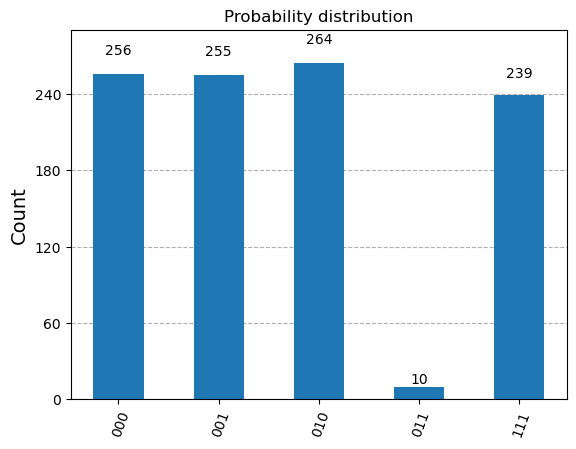

In [5]:

ang1 = 4*pi/8
ang2 = 4*pi/8
ang3 = 7*pi/8
circ = QuantumCircuit(3)
circ.ry(ang1,0)
circ.ry(ang2,1)

ccry = RYGate(ang3).control(2)
circ.append(ccry, [0, 1, 2 ])


rho = DensityMatrix(circ)
# Probabilities for measuring only qubit-i
qprobs = np.zeros((3,2))
for iq in range(3):
    qprobs[iq] = rho.probabilities([iq])
    print('Qubit-{} probs: {}'.format(iq, qprobs[iq]))
circ.measure_all()

simulator = AerSimulator()
circ = transpile(circ, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(circ)
print(counts)
plot_histogram(counts, title='Probability distribution')
